In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.



In [7]:
def get_lower_and_upper_bounds(series, multiplier):
    ''' function to get the upper and lower bounds'''
    multiplier=1.5
    # 1st quartile
    q1= series.quantile(0.25)
    # third quantile
    q3= series.quantile(0.75)
    #calculate Iqr
    iqr= q3- q1
    #set lower bound using the multiplier
    lower_bound= q1 - (multiplier * iqr)
    # set upper limit
    upper_bound= q3 + (multiplier * iqr)
    return lower_bound, upper_bound
    
    

# Using lemonade.csv dataset and focusing on continuous variables:
- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- - Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?




In [8]:
# get the lemonade.csv
url= 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'
df= pd.read_csv(url)
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [50]:
# #find out q1, q3 for each variable
# q1 = df.quantile(0.25)
# q3 = df.quantile(0.75)

# iqr = q3-q1
# iqr

Temperature    22.00
Rainfall        0.26
Flyers         18.00
Price           0.00
Sales          10.00
dtype: float64

In [38]:
col= df.iloc[:,2:]


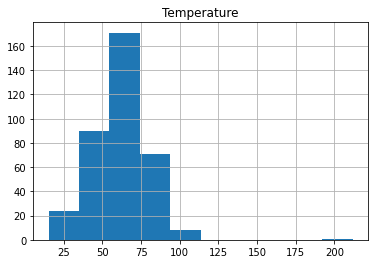

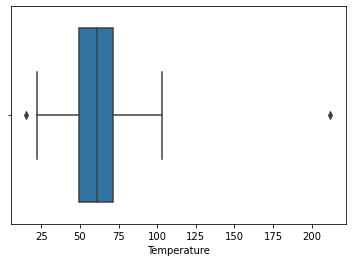

------------------------


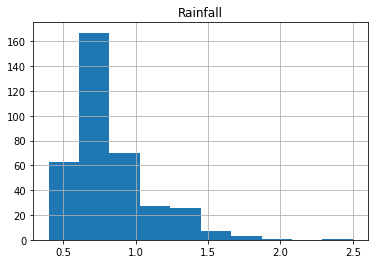

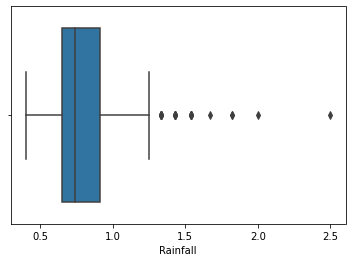

------------------------


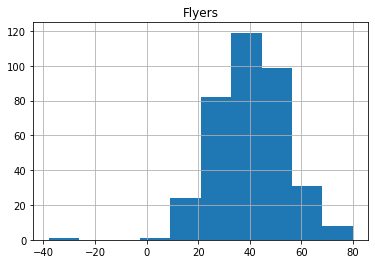

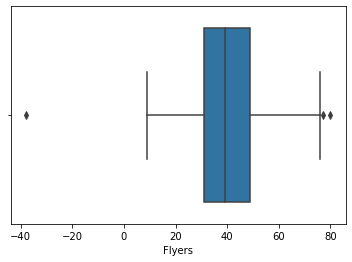

------------------------


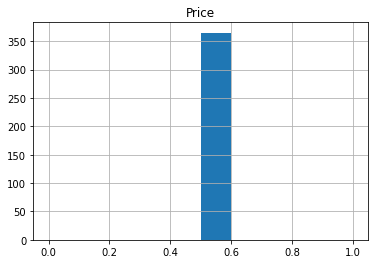

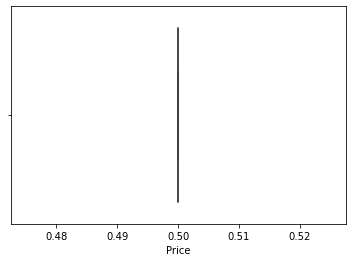

------------------------


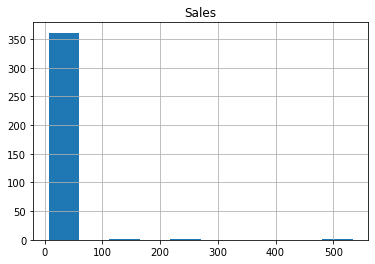

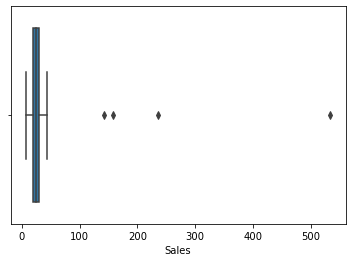

------------------------


In [39]:
for cols in col:
    df[cols].hist()
    plt.title(cols)
    plt.show()
    sns.boxplot(data= df, x=cols)
    plt.show()
    print('------------------------')
    
    

In [9]:
get_lower_and_upper_bounds(df.Temperature,1.5)

(16.700000000000003, 104.7)

In [46]:
get_lower_and_upper_bounds(col,1.5)


(Temperature    16.70
 Rainfall        0.26
 Flyers          4.00
 Price           0.50
 Sales           5.00
 dtype: float64,
 Temperature    104.7
 Rainfall         1.3
 Flyers          76.0
 Price            0.5
 Sales           45.0
 dtype: float64)

- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?


- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [53]:
get_lower_and_upper_bounds(df, 3)

(Temperature    16.70
 Rainfall        0.26
 Flyers          4.00
 Price           0.50
 Sales           5.00
 dtype: float64,
 Temperature    104.7
 Rainfall         1.3
 Flyers          76.0
 Price            0.5
 Sales           45.0
 dtype: float64)

# Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.

- Do these make sense?
- Should certain outliers be kept or removed?





/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

<AxesSubplot:xlabel='Sales', ylabel='Density'>

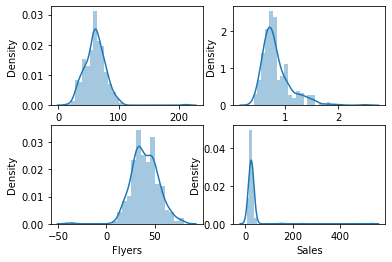

In [54]:
f, axes = plt.subplots(2, 2)

sns.distplot(df.Temperature, ax=axes[0,0])
sns.distplot(df.Rainfall, ax=axes[0,1])
sns.distplot(df.Flyers, ax = axes[1,0])
sns.distplot(df.Sales, ax = axes[1,1])



In [55]:
# temperature column
x= df.Temperature
#zscore equation
zscores = pd.Series((x - x.mean()) / x.std())
zscores

0     -1.892340
1     -1.787286
2     -1.477652
3     -0.946852
4     -1.040848
         ...   
360   -1.024260
361   -1.295189
362   -1.201194
363   -1.676702
364   -2.550311
Name: Temperature, Length: 365, dtype: float64

In [56]:
# absolute zscores greater thamn 2
[abs(zscores)>2]

41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64

In [58]:
# zscore for rainfall column
y=df.Rainfall
rain_zscores= pd.Series((y - y.mean()) / y.std())
rain_zscores

0      4.286488
1      1.840253
2      1.840253
3      0.817946
4      0.635391
         ...   
360    0.635391
361    1.548165
362    1.548165
363    2.205363
364    6.112037
Name: Rainfall, Length: 365, dtype: float64

In [60]:
y[abs(rain_zscores)>2]

0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

In [63]:
#zscore for flyer
a= df.Flyers
zscore_f= pd.Series((a-a.mean())/a.std())
zscore_f

0     -1.820927
1     -1.820927
2     -0.950507
3     -0.877972
4     -0.515297
         ...   
360   -0.515297
361   -0.587832
362   -1.675857
363   -1.313182
364   -2.256137
Name: Flyers, Length: 365, dtype: float64

In [64]:
a[abs(zscore_f)> 2]

166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: Flyers, dtype: int64

# Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [57]:
x[abs(zscores)>3]

41    212.0
Name: Temperature, dtype: float64

In [61]:
y[abs(rain_zscores)> 3]

0      2.00
15     1.67
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

In [65]:
a[abs(zscore_f)> 3]

324   -38
Name: Flyers, dtype: int64